In [1]:
# 로이터 데이터셋 로드

from keras.datasets import reuters

# 가장 자주 등장하는 단어 1만개로 제한

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
print(len(train_data)) # 훈련 데이터 갯수
print(len(test_data)) # 테스트 데이터 갯수

train_data[10] # 각 샘플은 정수 리스트

8982
2246


[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
# 뉴스 샘플들을 벡터로 인코딩

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension)) # 크기가 (len(sequences),dimension)이고 모든 원소가 0으로 채워진 2차원 행렬 만들어줌
    for i, sequence in enumerate(sequences): 
        results[i, sequence] = 1. # result[i]에서 특정 인덱스의 위치를 1로 만듬
    return results

# x: 뉴스의 목록, 각 뉴스는 단어 인덱스의 리스트

x_train = vectorize_sequences(train_data) # 각 데이터들을 벡터로 변환
x_test = vectorize_sequences(test_data)

In [3]:
# 토픽들을 벡터 형태로 인코딩 (케라스 내장 함수 이용해 원핫 인코딩)

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [6]:
# 모델 정의하기

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# 모델 컴파일하기

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

# 검증 세트 준비 - 훈련 데이터에서 1000개의 샘플을 뗴어 검증 세트로 사용

# 단순 훈련데이터
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

# 토픽 데이터들을 벡터로 인코딩한 것
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [7]:
# 모델 훈련하기

hist = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 294us/step - loss: 2.6534 - accuracy: 0.4907 - val_loss: 1.7440 - val_accuracy: 0.6430
Epoch 2/20
7982/7982 [==============================] - 2s 229us/step - loss: 1.4150 - accuracy: 0.7046 - val_loss: 1.2809 - val_accuracy: 0.7300
Epoch 3/20
7982/7982 [==============================] - 2s 226us/step - loss: 1.0389 - accuracy: 0.7769 - val_loss: 1.1086 - val_accuracy: 0.7640
Epoch 4/20
7982/7982 [==============================] - 2s 225us/step - loss: 0.8154 - accuracy: 0.8309 - val_loss: 1.0284 - val_accuracy: 0.7860
Epoch 5/20
7982/7982 [==============================] - 2s 238us/step - loss: 0.6526 - accuracy: 0.8671 - val_loss: 0.9454 - val_accuracy: 0.7990
Epoch 6/20
7982/7982 [==============================] - 2s 236us/step - loss: 0.5203 - accuracy: 0.8926 - val_loss: 0.9051 - val_accuracy: 0.8130
Epoch 7/20
7982/7982 [==============================] - 2s 237us/step - loss

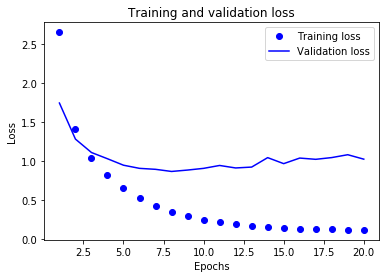

In [9]:
# 훈련과 검증 손실 그래프

import matplotlib.pyplot as plt

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

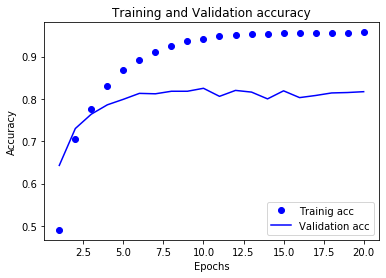

In [11]:
# 훈련과 검증 정확도 그리기

plt.clf() # 그래프 초기화

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

plt.plot(epochs,acc,'bo',label='Trainig acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [15]:
# 9번째부터 과대적합 일어나므로 9번까지만 훈련하는 새로운 모델 훈련 & 평가

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# 모델 컴파일하기

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

# 모델 훈련하기

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val,y_val))

# 모델 평가하기

results = model.evaluate(x_test, one_hot_test_labels)
print(results) # 약 78%의 정확도

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 275us/step - loss: 2.6768 - accuracy: 0.5144 - val_loss: 1.7890 - val_accuracy: 0.6430
Epoch 2/9
7982/7982 [==============================] - 2s 235us/step - loss: 1.4337 - accuracy: 0.6989 - val_loss: 1.3217 - val_accuracy: 0.7100
Epoch 3/9
7982/7982 [==============================] - 2s 224us/step - loss: 1.0592 - accuracy: 0.7661 - val_loss: 1.1359 - val_accuracy: 0.7490
Epoch 4/9
7982/7982 [==============================] - 2s 228us/step - loss: 0.8301 - accuracy: 0.8230 - val_loss: 1.0424 - val_accuracy: 0.7750
Epoch 5/9
7982/7982 [==============================] - 2s 229us/step - loss: 0.6582 - accuracy: 0.8649 - val_loss: 0.9673 - val_accuracy: 0.7970
Epoch 6/9
7982/7982 [==============================] - 2s 237us/step - loss: 0.5289 - accuracy: 0.8913 - val_loss: 0.9583 - val_accuracy: 0.8090
Epoch 7/9
7982/7982 [==============================] - 2s 234us/step - loss: 0.425

In [16]:
# 새로운 데이터에 대해 예측하기

pred = model.predict(x_test)

print(pred[0].shape) # pred의 각 항목은 길이가 46인 벡터
print(np.sum(pred[0])) # 이 벡터의 원소의 합은 1
print(np.argmax(pred[0])) # 가장 큰 값이 예측 클래스가 된다 - 즉 확률이 가장 높은 클래스

(46,)
1.0000001
3
